In [94]:
import dill
import scipy.io
import numpy.linalg
import matplotlib.pyplot as plt
import numpy as np

deg = np.pi/180

In [30]:
def Fr(w):
    p1 = 0.3117
    q1 = 0.4623
    p2 = 0.1396
    q2 = 0.3819
    
    cond_1 = w <= -2 * q2 / p2
    expr_1 = p2 * w + q2
    cond_2 = w <= 0
    expr_2 = - p2 ** 2 / (4 * q2) * w ** 2
    cond_3 = w <= 2 * q1 / p1
    expr_3 = p1 ** 2 / (4 * q1) * w ** 2
    cond_4 = True
    expr_4 = p1 * w - q1

    if cond_1:
        return expr_1
    elif cond_2:
        return expr_2
    elif cond_3:
        return expr_3
    elif cond_4:
        return expr_4

In [12]:
traj_mat = scipy.io.loadmat("../matlab/trajectories/pnp_eps_clear_t10.mat")
fun_dict = dill.load(open("sys_functions.p", "rb"))

In [68]:
t = traj_mat['t'].T
phi = traj_mat['phi'][:, 0]
dphi = traj_mat['phi'][:, 1]
ddphi = traj_mat['phi'][:, 2]
eps = traj_mat['eps'][:, 0]
deps = traj_mat['eps'][:, 1]
ddeps = traj_mat['eps'][:, 2]
lamb = traj_mat['lamb'][:, 0]
dlamb = traj_mat['lamb'][:, 1]
ddlamb = traj_mat['lamb'][:, 2]
vf = traj_mat['vf'].flatten()
vb = traj_mat['vb'].flatten()

M_diag_fun = fun_dict['M_diag']
C_fun = fun_dict['C']
G_fun = fun_dict['G']
f_fun = fun_dict['f']
Mu = np.array(fun_dict['Mu']).astype(np.float64)

In [105]:
ddq_sys_funs = np.empty((len(t), 3))
ddq_part_C = np.empty((len(t), 3))

for i in range(len(t)):
    x_i = np.array([phi[i], eps[i], lamb[i], dphi[i], deps[i], dlamb[i]])
    u_i = np.array([Fr(vf[i]), Fr(vb[i])])
    
    ddq_sys_funs[i] = numpy.linalg.solve(M_diag_fun(*x_i), f_fun(*x_i, *u_i) - G_fun(*x_i) - C_fun(*x_i) - Mu@x_i[3:].reshape((3, 1))).T
    ddq_part_C[i] = numpy.linalg.solve(M_diag_fun(*x_i), - C_fun(*x_i)).T

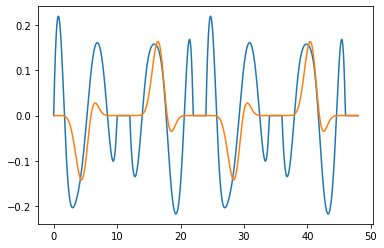

In [107]:
plt.plot(t, ddphi)
plt.plot(t, ddq_part_C[:, 0])

In [103]:
i = 1000

x_i = np.array([phi[i], eps[i], lamb[i], dphi[i], deps[i], dlamb[i]])
u_i = np.array([Fr(vf[i]), Fr(vb[i])])

print(f_fun(*x_i, *u_i))
print(G_fun(*x_i))

[[ 2.13717932e-15]
 [ 1.14556471e+00]
 [-2.02983627e-14]]
[[5.43835810e-16]
 [1.05146618e+00]
 [0.00000000e+00]]


In [104]:
u_i

array([0.86785205, 0.86785205])